<a href="https://colab.research.google.com/github/deepinmachine/Bike-demand-prediction/blob/main/Bike_sharing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BIKE SHARING DATA PREDICTION

Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing required data
path='/content/drive/MyDrive/SeoulBikeData.csv'
df=pd.read_csv(path, encoding='ISO-8859-1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

we have 8760 rows and 14 columns

#Describing dataset
Rented_Bike_Count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s


Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fu(Functional hours)






In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


snowfall and rainfall are very interesting as they have maximum values and then other values are just zero , we will understand this during univariate analysis

In [ ]:
#rename some columns for convinence
df.rename({'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind Speed','Visibility (10m)':
'Visiblity','Dew point temperature(°C)':'Dew point','Solar Radiation (MJ/m2)':'Solar Radiation','Rainfall(mm)':'Rainfall',
           'Snowfall (cm)':'Snowfall'},axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented Bike Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   Temperature        8760 non-null   float64
 4   Humidity           8760 non-null   int64  
 5   Wind Speed         8760 non-null   float64
 6   Visiblity          8760 non-null   int64  
 7   Dew point          8760 non-null   float64
 8   Solar Radiation    8760 non-null   float64
 9   Rainfall           8760 non-null   float64
 10  Snowfall           8760 non-null   float64
 11  Seasons            8760 non-null   object 
 12  Holiday            8760 non-null   object 
 13  Functioning Day    8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


We do not have any null values

There are 4 categorical columns Date, Seasons, Functioning , Holiday
while other columns are numerical

Date shouldn't have object type

In [ ]:
#checking for duplicates
df.duplicated().value_counts()

False    8760
dtype: int64

There are no duplicates also

In [ ]:
#creating copy of data to keep original data safe
df1=df.copy()

In [ ]:
#changing date datatype
df1['Date']=pd.to_datetime(df1['Date'], infer_datetime_format=True)

<ipython-input-10-120bc0480195>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Date']=pd.to_datetime(df1['Date'], infer_datetime_format=True)


In [ ]:
import calendar
#Extracting Month, year and day from the date
df1['Month']=pd.DatetimeIndex(df1['Date']).month
df1['Month']=df1['Month'].apply(lambda x:calendar.month_abbr[x])

In [ ]:
#extracting day
df1['Day']=df1['Date'].dt.day_name()

In [ ]:
#extracting year
df1['Year']=df1['Date'].dt.year

In [ ]:
df1.drop(columns=['Date'],inplace=True)

In [ ]:
df1.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visiblity,Dew point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thursday,2017


Hour is represented as numerical type in this data we will change it inot object type so that it can be used as categorical as it represent the timestamp

Holiday have two values either holiday or not holiday

funtioning day have two values either yes on no

There are four seasons , two years, seven days and 12 months


In [ ]:
df1['Hour']=df1['Hour'].astype('object')

NOW DOING EDA

univariate , multicariate and Bi-variate analysis

In [ ]:
#copying data
df2=df1.copy()

In [ ]:
num_feature=df2.select_dtypes(exclude='object')

In [ ]:
lst=num_feature.columns.to_list()

In [ ]:
from scipy.stats import norm

<ipython-input-21-0a511782c48f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[coulmn],color='red',fit = norm)
<ipython-input-21-0a511782c48f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[coulmn],color='red',fit = norm)
<ipython-input-21-0a511782c48f>:5: UserWarning: 

`distplot` i

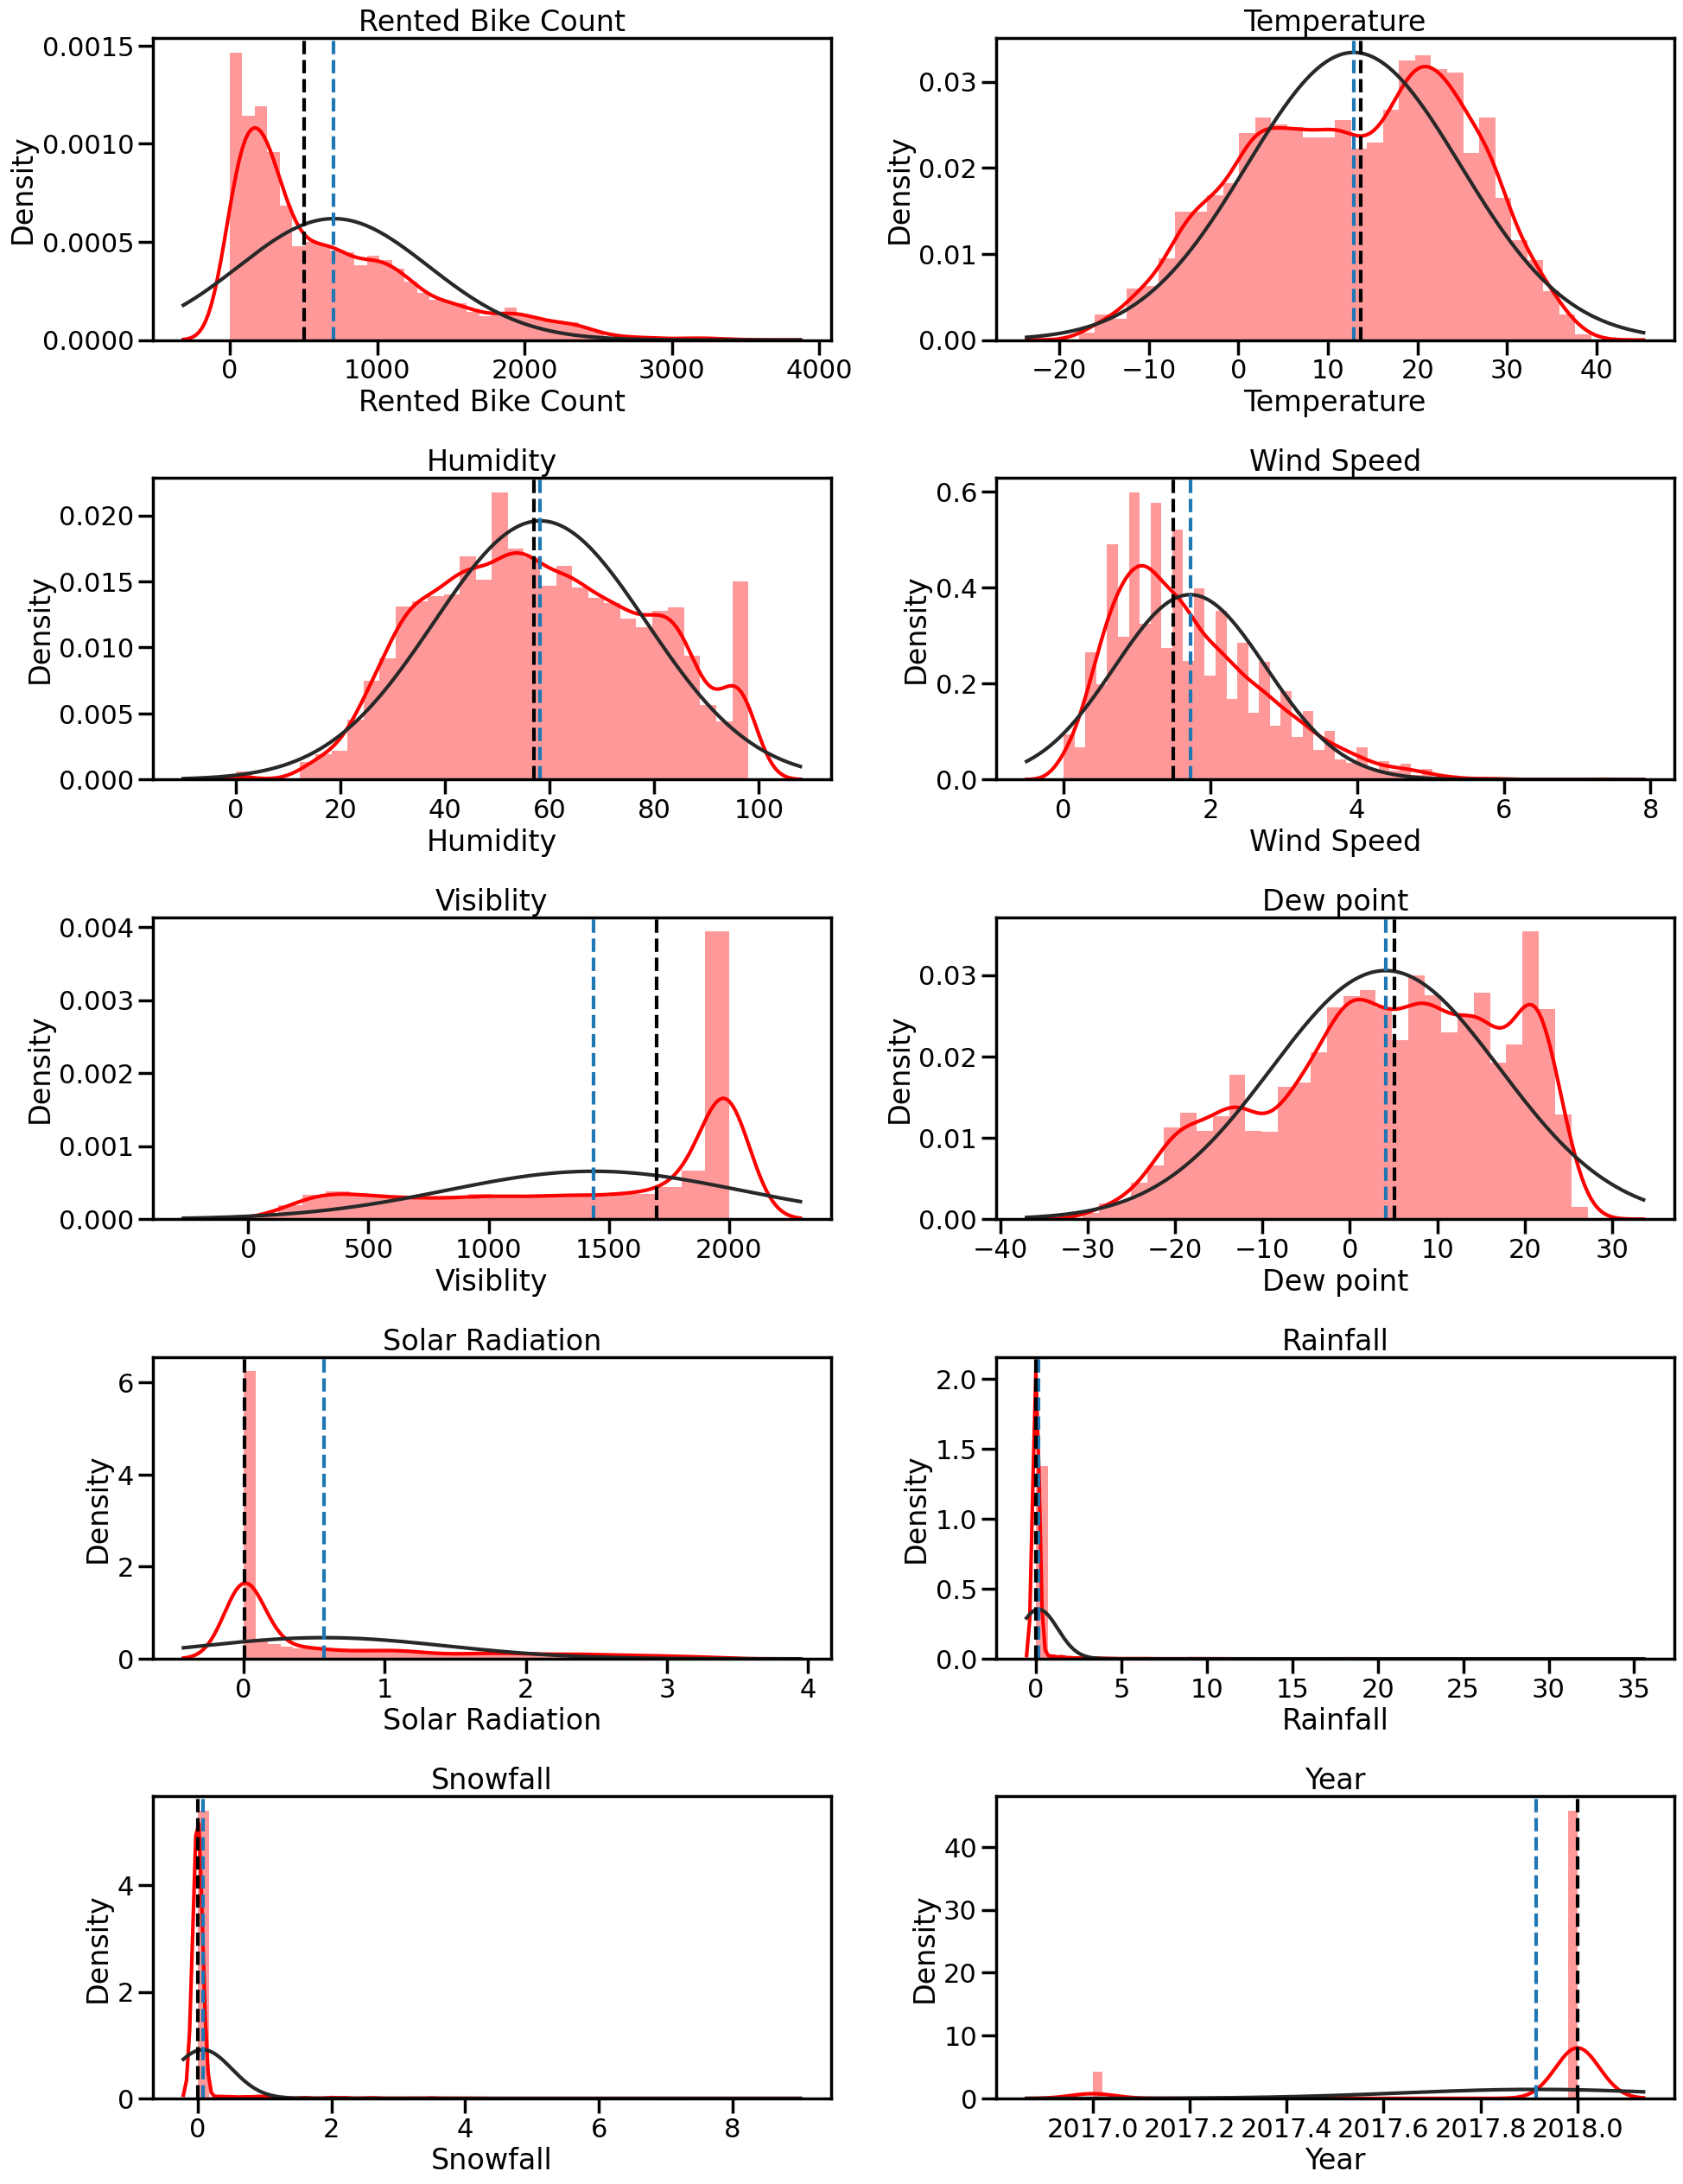

In [ ]:
plt.figure(figsize=(20,30))
for i,coulmn in enumerate(lst):
  sns.set_context('poster')
  plt.subplot(6,2,i+1)
  sns.distplot(df2[coulmn],color='red',fit = norm)
  plt.axvline(df2[coulmn].mean(),linewidth=3,linestyle='dashed')
  plt.axvline(df2[coulmn].median(),linewidth=3,linestyle='dashed',color='black',label='median')
  plt.title(coulmn)
plt.tight_layout()
plt.show()

From the above graphs we can summarise that:

Right Skewed Distribution: Mode < Median < Mean: Rented_Bike_Count, Wind_speed, Solar Radiation

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity,Rainfall,Snowfall

Left Skewed Distribution: Mean < Median < Mode: visibility

#BIVARIATE ANALYSIS

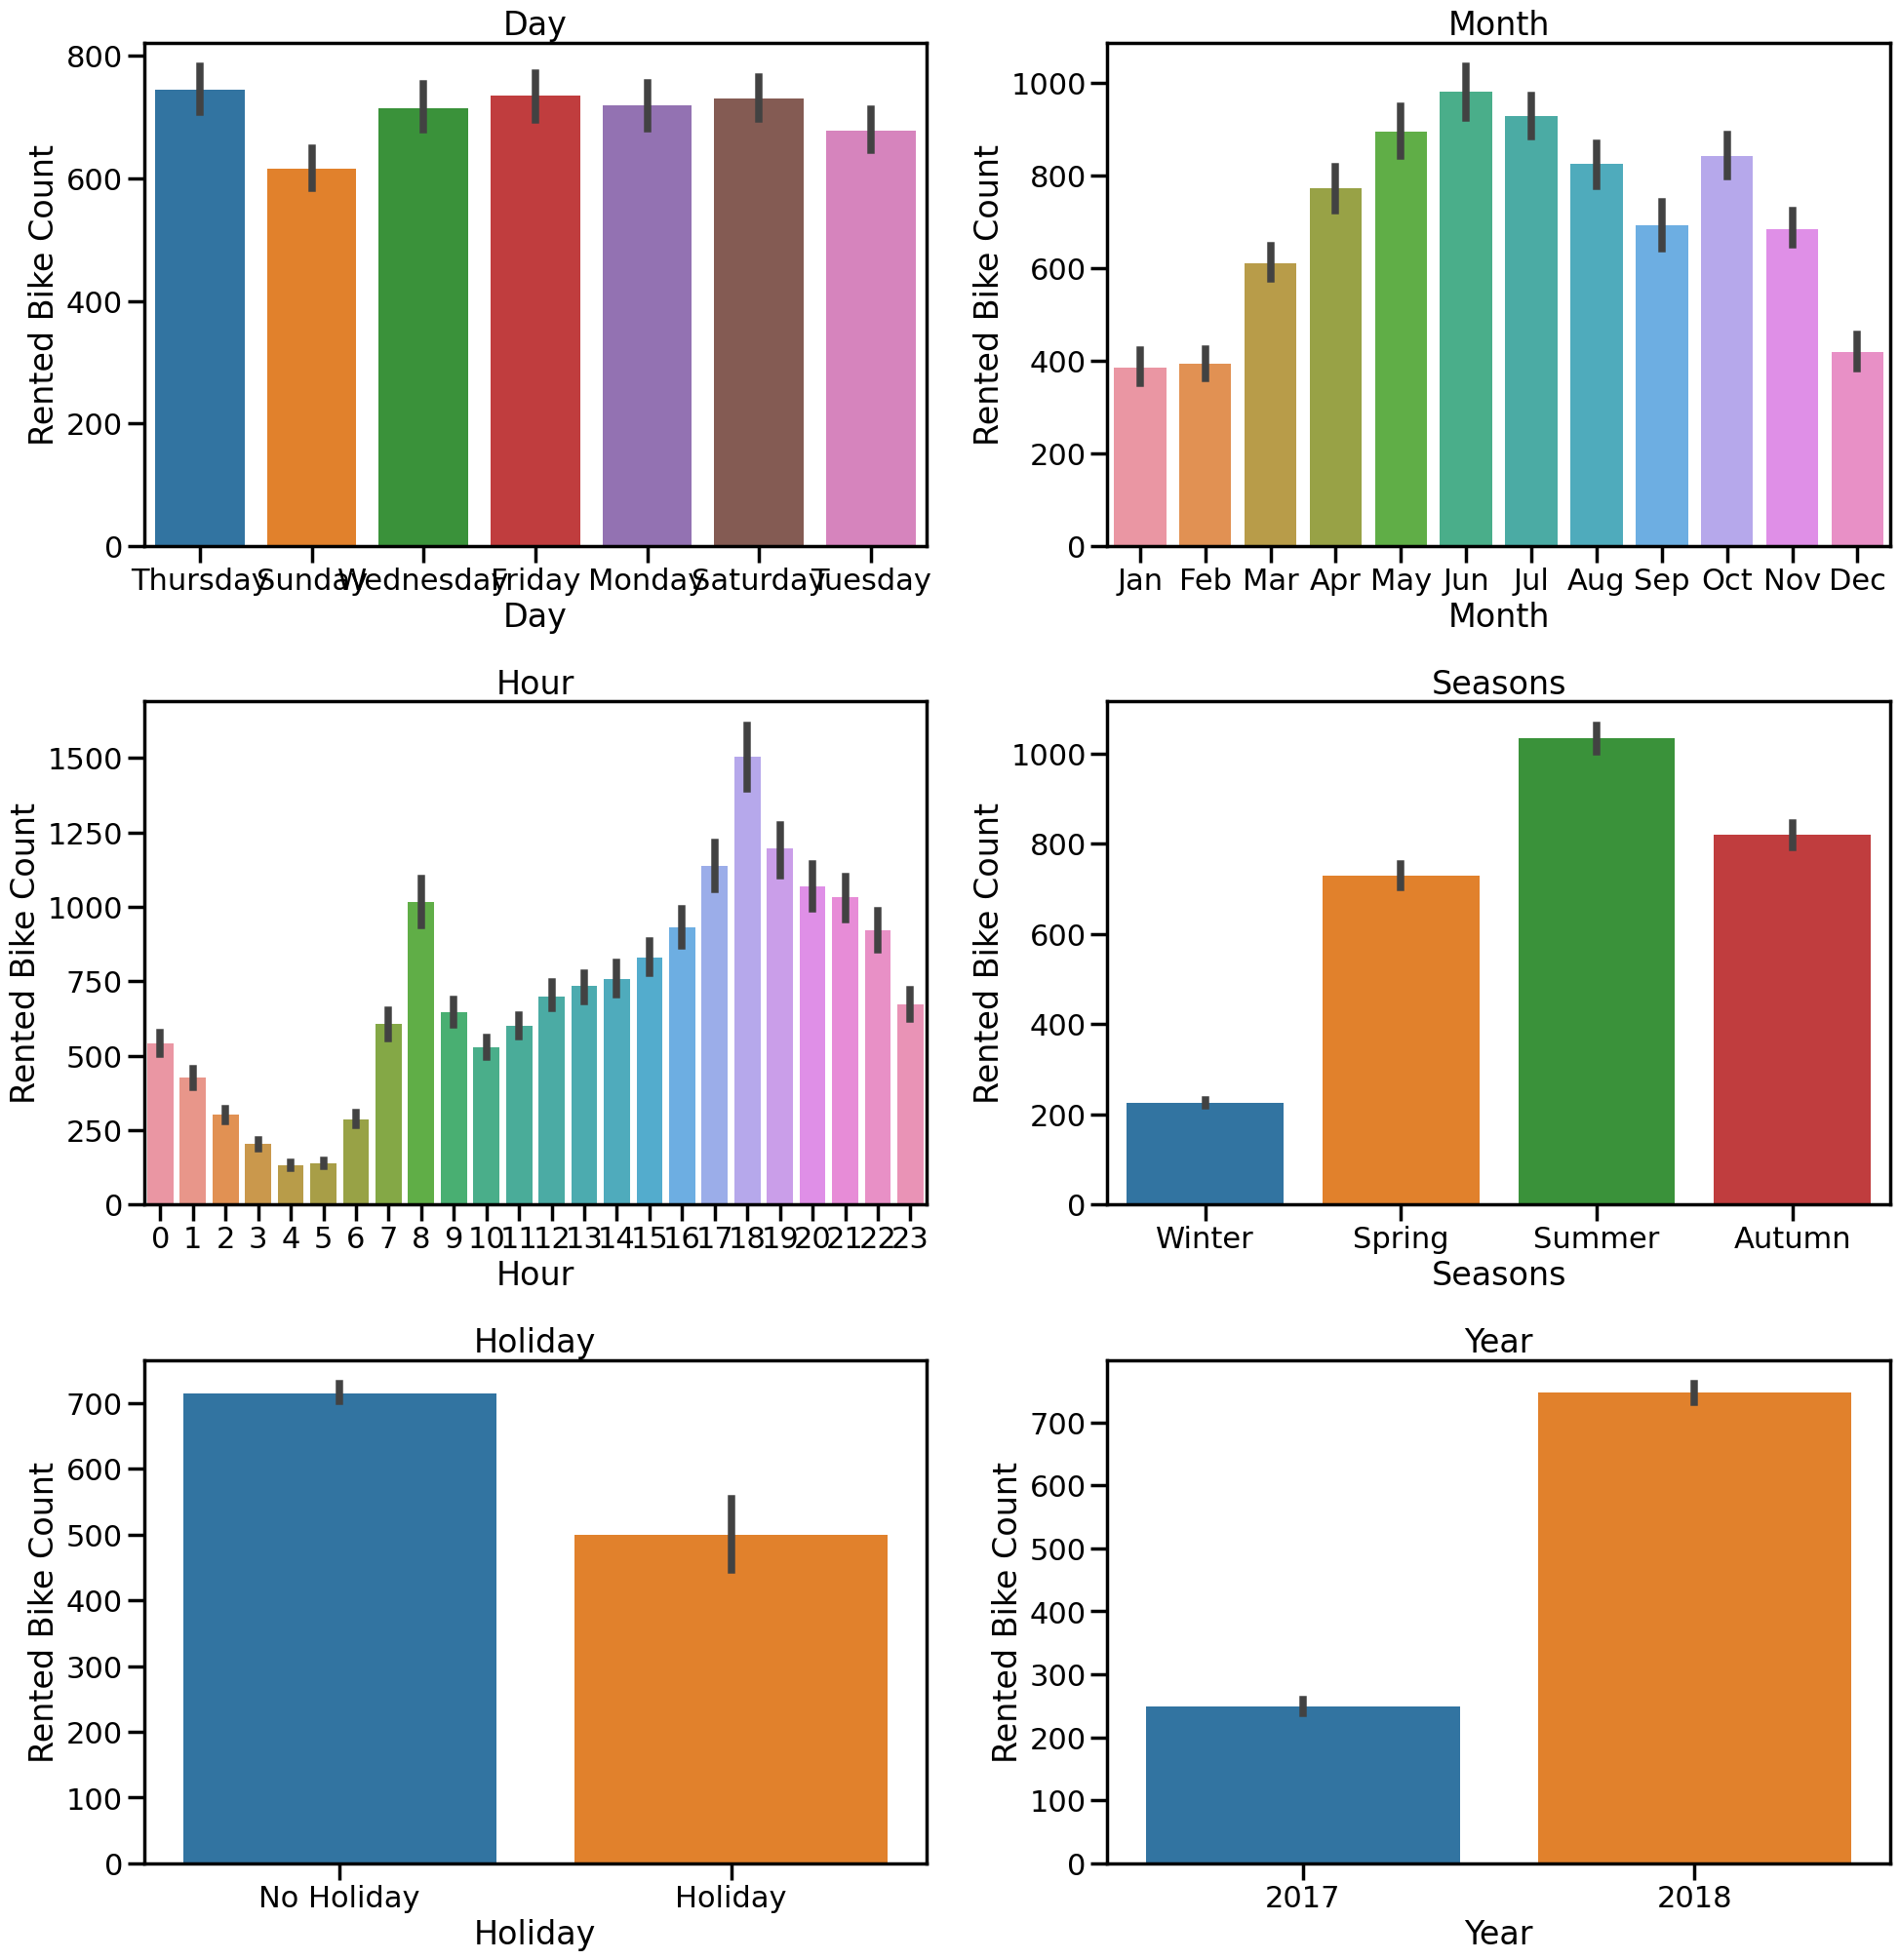

In [ ]:
#we try to find how rented bike count varies with different featueres
plt.figure(figsize=(20,40))
for i,j in enumerate(['Day','Month','Hour','Seasons','Holiday','Year']):
  plt.subplot(6,2,i+1)
  sns.barplot(y=df2['Rented Bike Count'],x=df2[j])
  plt.title(j)
plt.tight_layout()
plt.show()

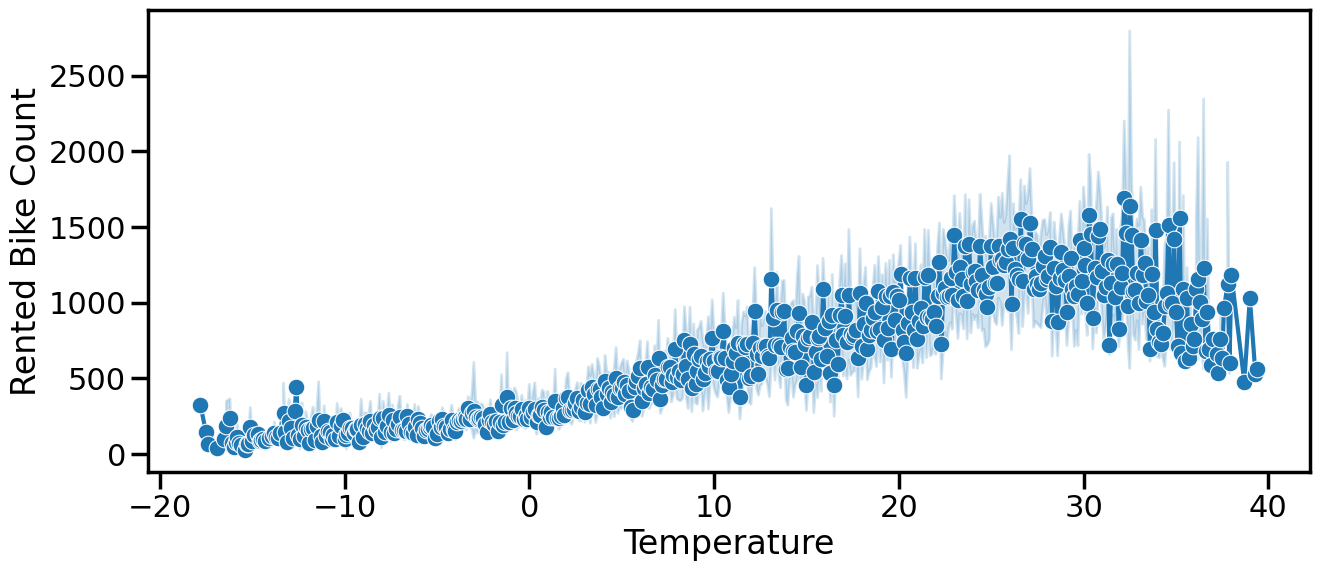

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df2['Temperature'],y=df2['Rented Bike Count'],marker='o')
plt.show()

We can clearly see that rented bike number are very less on sunday compared to other day.

for winter there less number of rented bike.

number of rented bike increases with temperature.

non-holiday days have more bike rented.

and for hour analysis working hours have greater number of bikes rented.


In [ ]:
df2.groupby(['Functioning Day'],as_index=False)['Rented Bike Count'].sum()

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


In case of non functioning days there no bike rented, so i believe funcationing days would have very low correaltion with the rented bikes number so this column must be dropped.

In [ ]:
df2=df2.drop(['Functioning Day'],axis=1)

In [ ]:
#as sunday and saturday are also weekend and other days are working so we can convert the day to week
df2['Week']=df2['Day'].apply(lambda x:'Weekend' if x=='Sunday'or x=='Saturday' else 'Workingday')

In [ ]:
df2.head(1)

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visiblity,Dew point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Day,Year,Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Jan,Thursday,2017,Workingday


<ipython-input-28-f4b7ef061de7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,cmap='PiYG')


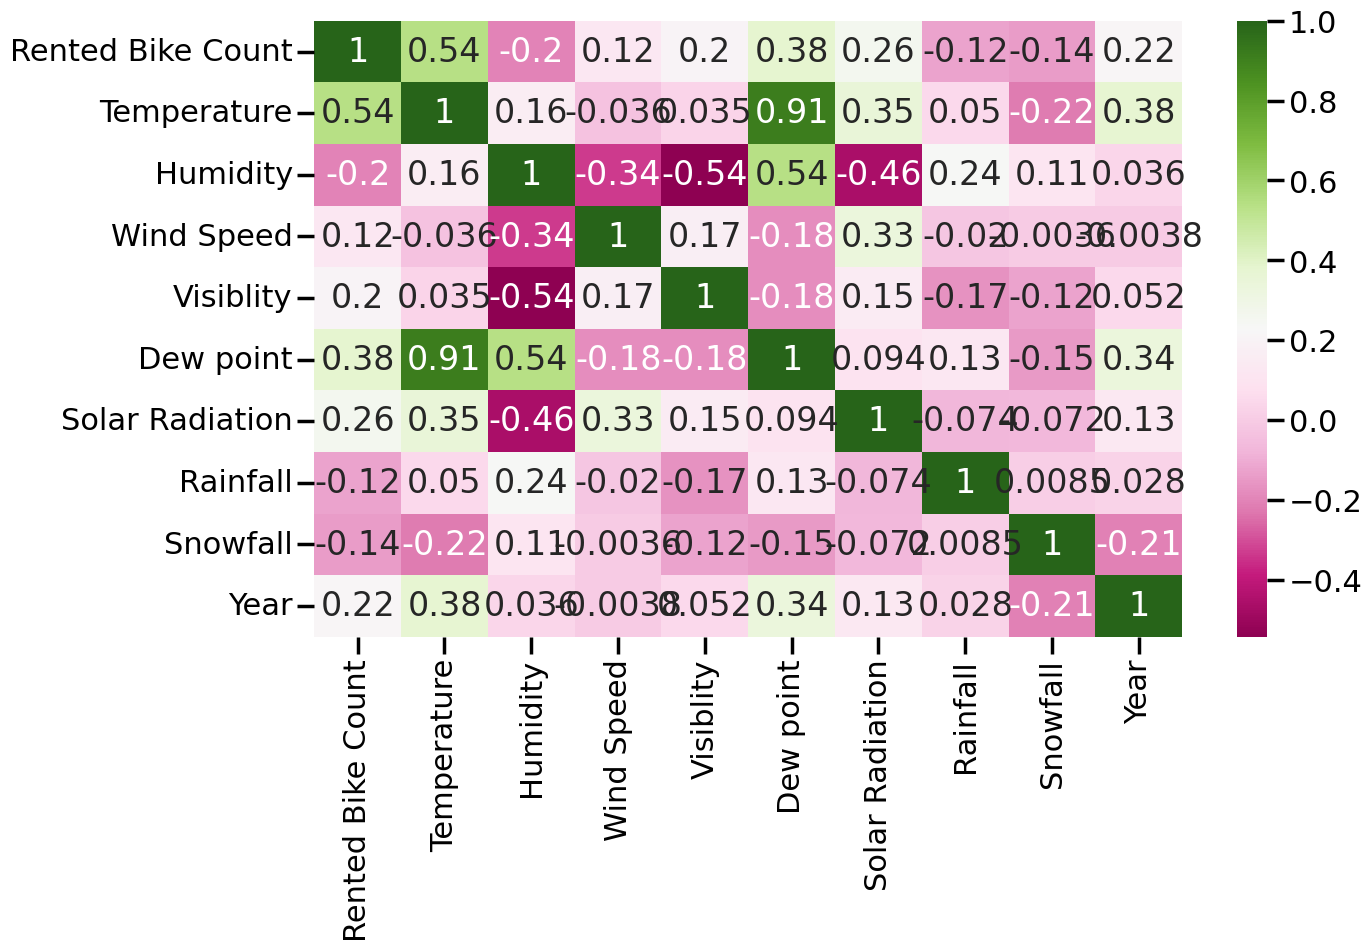

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df2.corr(),annot=True,cmap='PiYG')
plt.show()

feature like temperature and dew_point have very high correlation.

#FEATURE ENGINEERING
1. OUTLIER CHECKING
2. MULTI COLLINEARTY
3. CATEGORINZING AND ENCODING VARIABLE
4. TRANSFORMATION

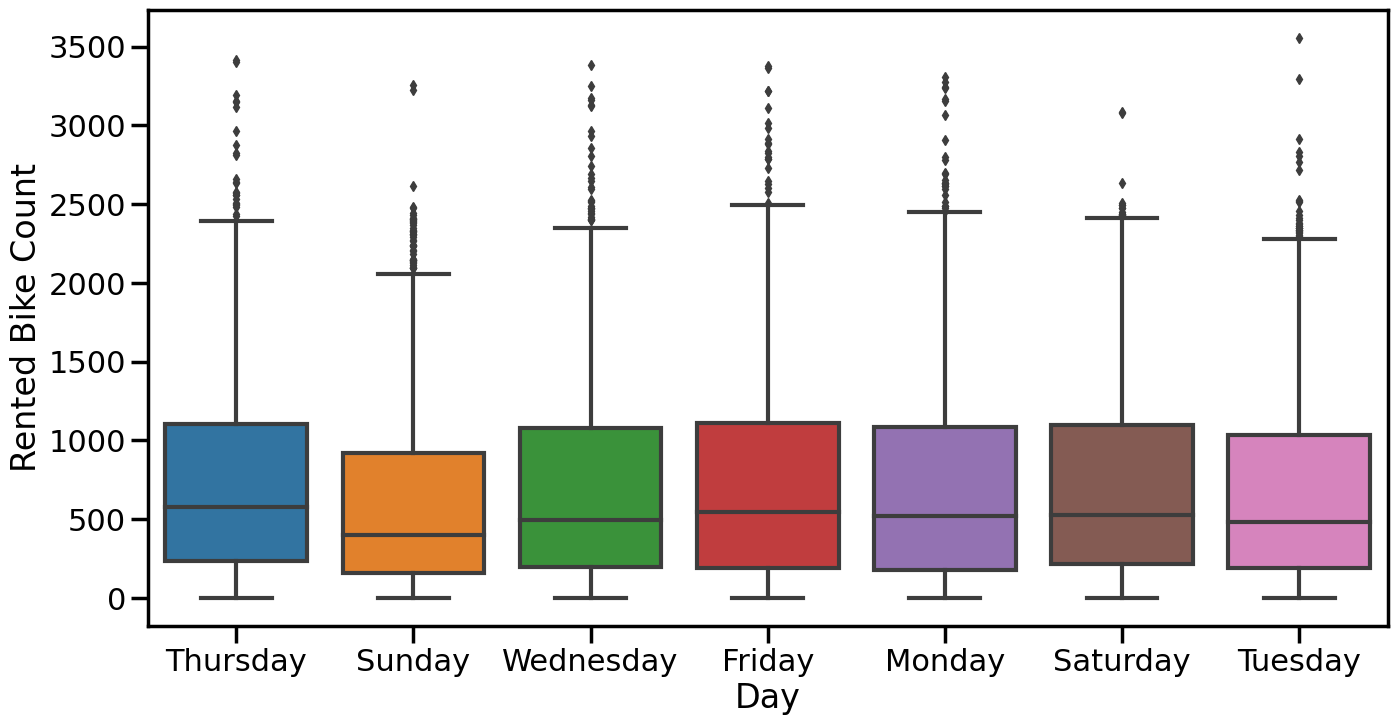

In [ ]:
#BOX PLOT
plt.figure(figsize=(16,8))
sns.boxplot(y=df2['Rented Bike Count'],x=df2['Day'])
plt.show()

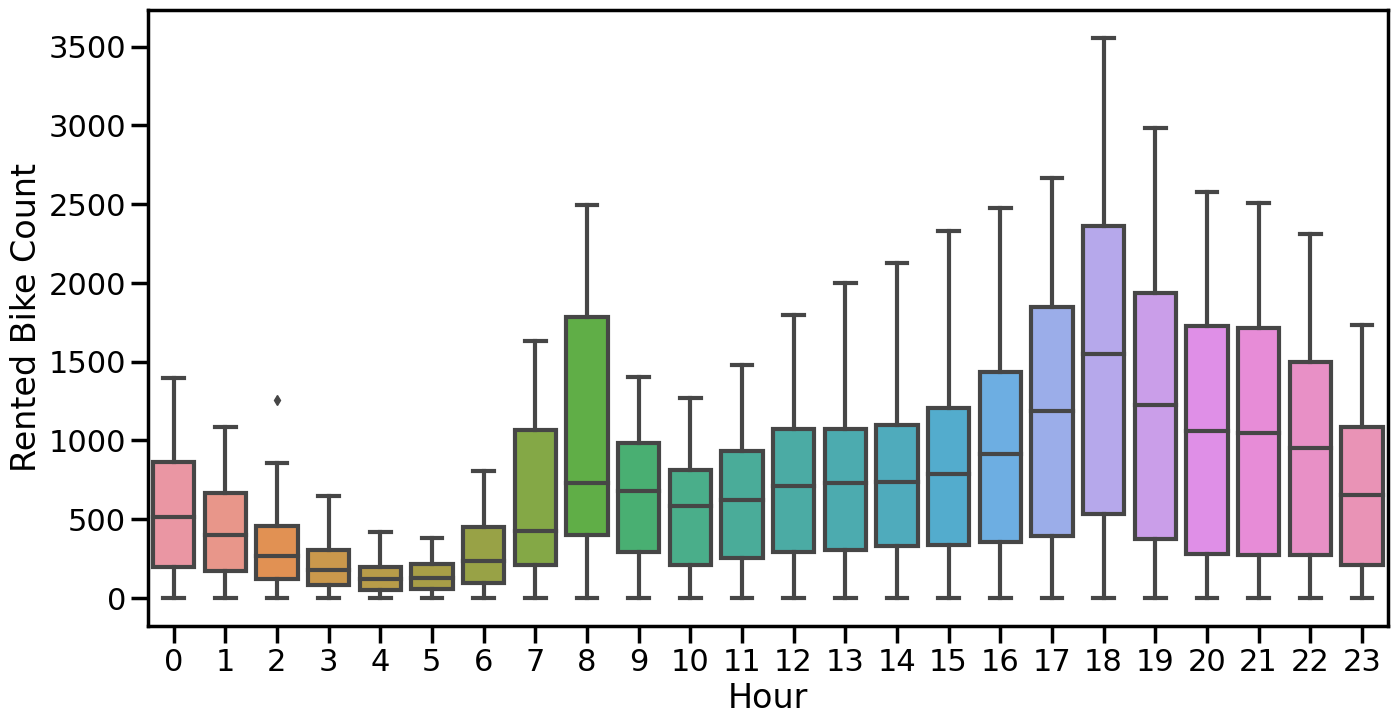

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(y=df2['Rented Bike Count'],x=df2['Hour'])
plt.show()

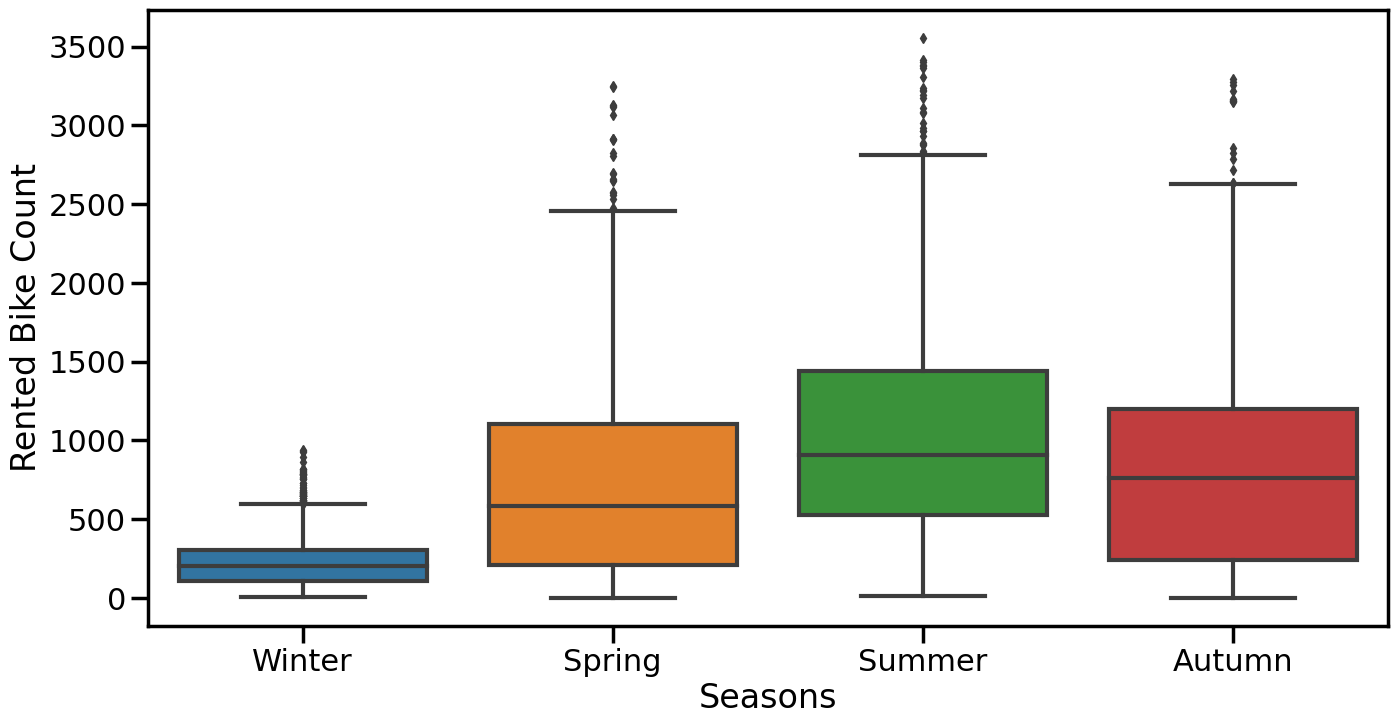

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(y=df2['Rented Bike Count'],x=df2['Seasons'])
plt.show()

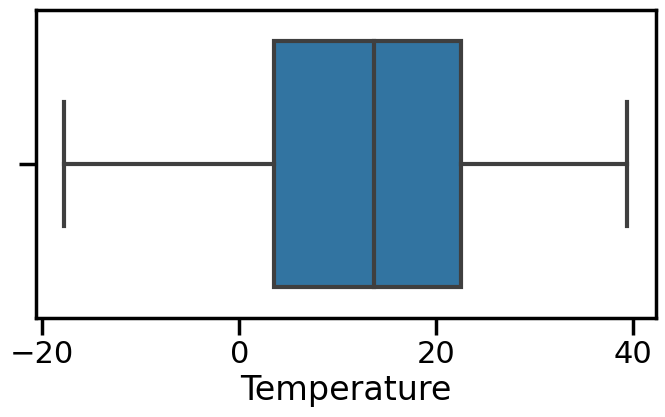

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df2['Temperature'])
plt.show()

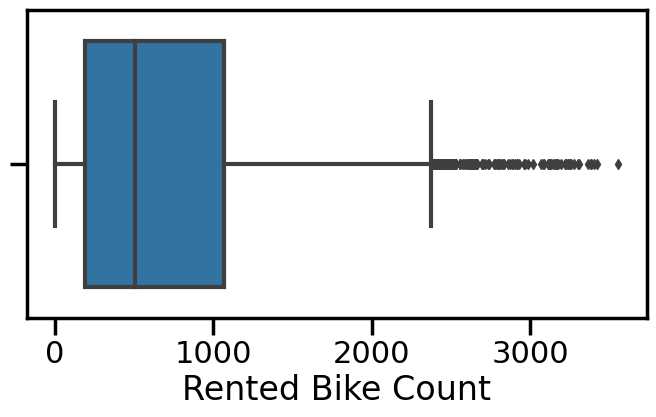

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df2['Rented Bike Count'])
plt.show()

In [ ]:
df3=df2.copy()

In [ ]:
Q1 = df3['Rented Bike Count'].quantile(0.25)
Q3 = df3['Rented Bike Count'].quantile(0.75)
lower_fence = Q1 - 1.5 * (Q3 - Q1)
upper_fence = Q3 + 1.5 * (Q3 - Q1)

# Remove outliers in 'column_name' only
df31 = df3[(df3['Rented Bike Count'] >= lower_fence) & (df3['Rented Bike Count'] <= upper_fence)]

In [ ]:
df31.shape

(8602, 16)

Encoding categorical variable

In [ ]:
df31.head(1)

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visiblity,Dew point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Day,Year,Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Jan,Thursday,2017,Workingday


In [ ]:
#as we have already converted day to working and weekend
df31.drop(columns=['Day'],axis=1)

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visiblity,Dew point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Year,Week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Jan,2017,Workingday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Jan,2017,Workingday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Jan,2017,Workingday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Jan,2017,Workingday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Jan,2017,Workingday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Nov,2018,Workingday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Nov,2018,Workingday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Nov,2018,Workingday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Nov,2018,Workingday


In [ ]:
df31=df31.drop(columns=['Year'],axis=1)

In [ ]:
df31=df31.drop(columns=['Dew point'],axis=1)

as dew point have very high collinearity with temperature and year very low correlation to bike count

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df32 = df31.apply(LabelEncoder().fit_transform)

In [ ]:
df32.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visiblity,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Day,Week
0,253,0,111,28,22,1781,0,0,0,3,1,4,4,1
1,203,1,108,29,8,1781,0,0,0,3,1,4,4,1
2,172,2,103,30,10,1781,0,0,0,3,1,4,4,1
3,106,3,101,31,9,1781,0,0,0,3,1,4,4,1
4,77,4,103,27,23,1781,0,0,0,3,1,4,4,1


#Feature scaling

In [ ]:
#we knew our rented bike was right skewed so i will se np.sqrt to normalize data
df32['Rented Bike Count']=np.sqrt(df32['Rented Bike Count'])

In [ ]:
#Model Training
X=df32.drop(columns=['Rented Bike Count'],axis=1)#Independent variable
Y=df32['Rented Bike Count']# target variable


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=102)

In [ ]:
print(x_train.shape,x_test.shape )
print(y_train.shape,y_test.shape)

(6451, 13) (2151, 13)
(6451,) (2151,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Algorithms used for prediction
1. Linear regression.
2. Lasso regression
3. Ridge regression
4. KNeighbours regression
5. Random forest regression


In [ ]:
#importing different algorithms
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#linear regression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [ ]:
#importing metrices
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [ ]:
model_data={}

In [ ]:
model_data['name']='Linear Regression'
model_data['mse']=mse(y_test,y_pred1)
model_data['rmse']=np.sqrt(model_data['mse'])
model_data['r2_score']=r2(y_test,y_pred1)

In [ ]:
model_data

{'name': 'Linear Regression',
 'mse': 65.81649615736924,
 'rmse': 8.112736662641606,
 'r2_score': 0.4953597735232087}

In [ ]:
model2=Lasso(alpha=0.1,max_iter=2000)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [ ]:
model_data['name']='Lasso Regression'
model_data['mse']=mse(y_test,y_pred2)
model_data['rmse']=np.sqrt(model_data['mse'])
model_data['r2_score']=r2(y_test,y_pred2)
model_data

{'name': 'Lasso Regression',
 'mse': 66.02704086464881,
 'rmse': 8.125702484379355,
 'r2_score': 0.4937454467971095}

In [ ]:
model3=RandomForestRegressor(criterion='squared_error',random_state=121)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [ ]:
model_data['name']='RandomForestRegressor'
model_data['mse']=mse(y_test,y_pred3)
model_data['rmse']=np.sqrt(model_data['mse'])
model_data['r2_score']=r2(y_test,y_pred3)
model_data

{'name': 'RandomForestRegressor',
 'mse': 25.68164858604746,
 'rmse': 5.067706442370894,
 'r2_score': 0.8030889865699836}

In [ ]:
model4=KNeighborsRegressor(n_neighbors=5)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [ ]:
model_data['name']='KNeighborRegression'
model_data['mse']=mse(y_test,y_pred4)
model_data['rmse']=np.sqrt(model_data['mse'])
model_data['r2_score']=r2(y_test,y_pred4)
model_data

{'name': 'KNeighborRegression',
 'mse': 40.3175083582368,
 'rmse': 6.349606945176749,
 'r2_score': 0.6908702568998352}

In [ ]:
model5=Ridge(alpha=0.1,max_iter=2000)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [ ]:
model_data['name']='Ridge Regression'
model_data['mse']=mse(y_test,y_pred5)
model_data['rmse']=np.sqrt(model_data['mse'])
model_data['r2_score']=r2(y_test,y_pred5)
model_data

{'name': 'Ridge Regression',
 'mse': 65.81651890688947,
 'rmse': 8.112738064728177,
 'r2_score': 0.495359599093944}

#we can see that randomforestregressor works best for the model so we should use that for prediction

#Conclusion
1. RandomForestRegressor model shows promising result, therefore it can be used to solve this problem.

2. Bike rental count is high during week days than on weekend.

3. Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

4. People prefer to rent bike more in summer than in winter.

5. Bike demand is more on clear days than on snowy or rainy days.

6. Temperature range from 22 to 25(°C) has more demand for bike.

7. 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed','Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'month', 'day of week ' regulates bike demand.